# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sinasc = pd.read_csv('sinasc_RO_2019.csv')
sinasc['APGAR5'] = sinasc['APGAR5'].astype(float)

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [7]:
sinasc.loc[(sinasc['APGAR5'] >= 8), 'CATEGORIA'] = 'normal'
sinasc.loc[(sinasc['APGAR5'] > 6) & (sinasc['APGAR5'] <= 7),'CATEGORIA'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] > 4) & (sinasc['APGAR5'] <= 5),'CATEGORIA'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] <=3), 'CATEGORIA'] = 'asfixia grave'
sinasc['APGAR5']


0        10.0
1         9.0
2        10.0
3        10.0
4        10.0
         ... 
27023     9.0
27024     9.0
27025    10.0
27026     9.0
27027     8.0
Name: APGAR5, Length: 27028, dtype: float64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

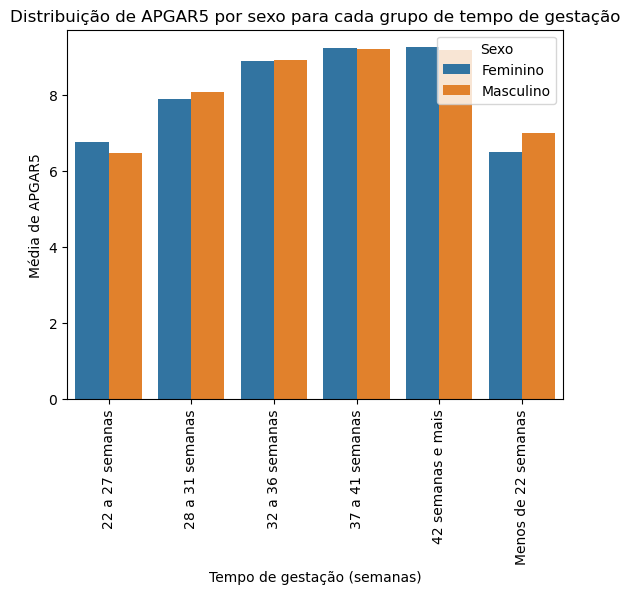

In [8]:
# Calcular a média de APGAR5 por sexo e grupo de gestação
apgar5_por_sexo_gestacao = sinasc.groupby(['GESTACAO', 'SEXO'])['APGAR5'].mean().reset_index()
plt.tick_params(axis="x", rotation = 90)

# Plotar o gráfico de barras empilhadas
sns.barplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=apgar5_por_sexo_gestacao)

# Adicionar título e legendas
plt.title('Distribuição de APGAR5 por sexo para cada grupo de tempo de gestação')
plt.xlabel('Tempo de gestação (semanas)')
plt.ylabel('Média de APGAR5')
plt.legend(title='Sexo', loc='upper right')

# Exibir o gráfico
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [9]:


# Criar a tabela cruzada
tabela_cruzada = pd.crosstab(index=sinasc['GESTACAO'], columns=sinasc['APGAR5'], margins=True)


tabela_cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
GESTACAO,,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8,85
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13,162
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465,2234
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284,22523
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223,698
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1,7
All,16,22,16,14,21,40,72,234,1908,15372,7994,25709


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [10]:
# Calcular os percentuais de linha
percentuais_linha = tabela_cruzada.apply(lambda x: x/x[-1], axis=1)

# Remover a linha e a coluna de totais
percentuais_linha = percentuais_linha.iloc[:-1,:-1]
percentuais_linha

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


In [11]:
sinasc['PARTO']

0        Cesáreo
1        Cesáreo
2        Cesáreo
3        Cesáreo
4        Cesáreo
          ...   
27023    Cesáreo
27024    Vaginal
27025    Cesáreo
27026    Vaginal
27027    Cesáreo
Name: PARTO, Length: 27028, dtype: object

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

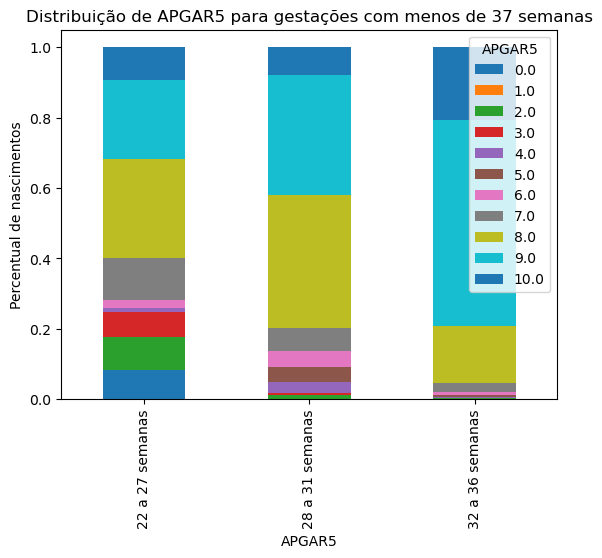

In [12]:


tabela_cruzada = pd.crosstab(index=sinasc['GESTACAO'], columns=sinasc['APGAR5'], margins=True)

# Remover a linha e a coluna de totais
tabela_cruzada = tabela_cruzada.iloc[:-1,:-1]

# Calcular os percentuais de linha
percentuais_linha = tabela_cruzada.apply(lambda x: x/x.sum(), axis=1)

# Selecionar as classes de GESTACAO com menos de 37 semanas
prematuros = percentuais_linha.loc[percentuais_linha.index < '37']

# Criar o gráfico de barras
ax = prematuros.plot(kind='bar', stacked=True)

# Configurar os eixos e os rótulos
ax.set_xlabel('APGAR5')
ax.set_ylabel('Percentual de nascimentos')
ax.set_title('Distribuição de APGAR5 para gestações com menos de 37 semanas')

# Exibir o gráfico
plt.show()


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

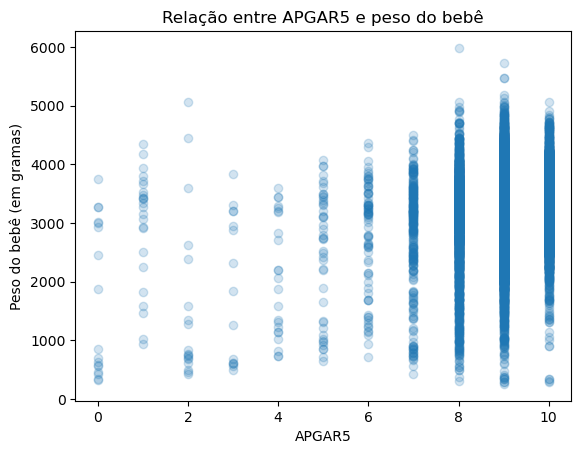

In [27]:
plt.close('all')



# Filtrar apenas os nascimentos com peso e APGAR5 registrados
sinasc_filtrado = sinasc.dropna(subset=['APGAR5', 'PESO'])

# Criar o gráfico de dispersão
plt.scatter(sinasc_filtrado['APGAR5'], sinasc_filtrado['PESO'], alpha=0.2)

# Configurar os eixos e o título
plt.xlabel('APGAR5')
plt.ylabel('Peso do bebê (em gramas)')
plt.title('Relação entre APGAR5 e peso do bebê')

# Exibir o gráfico
plt.show()


<AxesSubplot:>

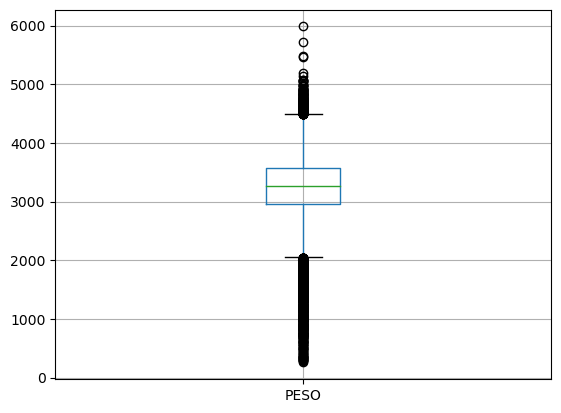

In [34]:
sinasc[['PESO']].boxplot()

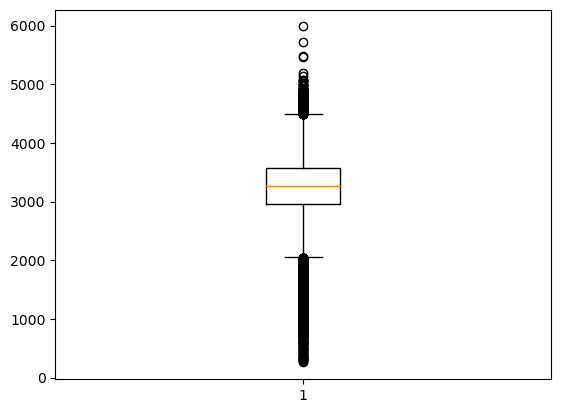

In [36]:
fig, ax = plt.subplots()
bp = ax.boxplot(sinasc['PESO'])

# Removendo os outliers
for outlier in bp['fliers']:
    outlier.set_clip_on(False)

# Exibindo o gráfico
plt.show()